## Numerical differentiation and spectral derivatives


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fft2, ifft, ifft2, fftfreq, fftshift
import pandas as pd


Assume we have a function $f \in C_p^k(0,L)$ (the space of
$k$ times continuously differentiable, $L$-period functions).

Given a set of $N$ equi-distributed sampling points 
$x_l = l N/L, l =0,\ldots, N-1$ with distance 
$h = N/L$, we denote by
$\boldsymbol{f} = \{f(x_l)\}_{l=0}^{N-1} \in \mathbb{R}^N$
the corresponding vector of the samples of $f$
and write $\boldsymbol{f}(l) = f(x_l)$.

Let's consider the following 
4 ways to approximate the derivative of $f$ at $x_l$:

\begin{align}
\text{Forward difference } 
&\partial^+ \boldsymbol{f}(l) = \dfrac{\boldsymbol{f}_{l+1} - \boldsymbol{f}_l}{h}
\\
\text{Backward difference } 
&\partial^- \boldsymbol{f}(l) = \dfrac{\boldsymbol{f}_l - \boldsymbol{f}_{l-1}}{h}
\\
\text{Central difference } 
&\partial^\circ \boldsymbol{f}(l) = \dfrac{\boldsymbol{f}_{l+1} - \boldsymbol{f}_{l-1}}{2h}
\\
\end{align}

<font color="LightSkyBlue">

\begin{align}
\text{Spectral derivative } 
&\partial^{\mathcal{F}} \boldsymbol{f}(l) = 
\mathcal{F}^{-1}_N(
    i \textbf{k}
\mathcal{F}_N(\boldsymbol{f})
)(l)
\end{align}

</font>

Here $\mathbf{k}$
 is the wave number vector
$2\pi/L (0,1,\ldots,N/2-1,-N/2,-N/2+1,\ldots,-1)$,

### Aproximation properties of the finite difference operators

Assuming that the function $f$ is sufficiently differentiable, the following estimates hold:

\begin{align}
\partial^+f(x_k) - f'(x_k) &= \mathcal{O}(h) = \mathcal{O}(N^{-1}) \\
\partial^-f(x_k) - f'(x_k) &= \mathcal{O}(h) = \mathcal{O}(N^{-1}) \\
\partial^\circ f(x_k) - f'(x_k) &= \mathcal{O}(h^2) = \mathcal{O}(N^{-2})
\end{align}

for $h \to 0$ (respectively $N \to \infty$).

<font color="green">

For $\mathcal{O}(h)$, dersom man halverer h, halveres feilen. For $\mathcal{O}(h^2)$, dersom man halverer h, reduseres feilen med en faktor 4.

</font>

Bevis

The proof is based on the Taylor expansion of the function $f$ around the point $x_k$.

1. **Forward difference**:
    Using Taylor expansion around $x_l$:
    $$
    f(x_{l+1}) = f(x_l) + h f'(x_l) + \frac{h^2}{2} f''(x_l) + \mathcal{O}(h^3)
    $$
    Therefore,
    $$
    \partial^+ f(x_l) = \frac{f(x_{l+1}) - f(x_l)}{h} = f'(x_l) + \frac{h}{2} f''(x_l) + \mathcal{O}(h^2)
    $$
    Hence,
    $$
    \partial^+ f(x_l) - f'(x_l) = \frac{h}{2} f''(x_l) + \mathcal{O}(h^2) = \mathcal{O}(h)
    $$

    2. **Backward difference**:
    Using Taylor expansion around $x_l$:
    $$
    f(x_{l-1}) = f(x_l) - h f'(x_l) + \frac{h^2}{2} f''(x_l) - \mathcal{O}(h^3)
    $$
    Therefore,
    $$
    \partial^- f(x_l) = \frac{f(x_l) - f(x_{l-1})}{h} = f'(x_l) -\frac{h}{2} f''(x_l) + \mathcal{O}(h^2)
    $$

    Hence,
    $$
    \partial^- f(x_l) - f'(x_l) = \frac{h}{2} f''(x_l) + \mathcal{O}(h^2) = \mathcal{O}(h)
    $$

    3. **Central difference**:
    Using Taylor expansion around $x_l$:
    $$
    f(x_{l+1}) = f(x_l) + h f'(x_l) + \frac{h^2}{2} f''(x_l) + \frac{h^3}{6} f'''(x_l) + \mathcal{O}(h^4)
    $$
    $$
    f(x_{l-1}) = f(x_l) - h f'(x_l) + \frac{h^2}{2} f''(x_l) - \frac{h^3}{6} f'''(x_l) + \mathcal{O}(h^4)
    $$    
    Therefore,
    $$
    \partial^\circ f(x_l) = \frac{f(x_{l+1}) - f(x_{l-1})}{2h} = f'(x_l) + \mathcal{O}(h^2)
    $$

    <font color="green">
    
    Leddet med $f'''$ bestemmer størrelsesordenen på feilen, og gir $\mathcal{O}(h^2)$.
    
    </font>

    Hence,
    $$
    \partial^\circ f(x_l) - f'(x_l) = \mathcal{O}(h^2)
    $$

### Numerical experiments

Next, we implement the 4 numerical differentiation methods and compare their performance on the functions
$$
f(x) = 0.1 e^{1+\sin(x)} + 0.1 \sin(4x)
$$
given on the interval $[0,2\pi)$.

First, for four different sampleing sizes $N = 4, 8, 12, 16$, plot the exact derivate $f'(x)$ and the corresponding 4 different approximations.
Afterward, perform a convergence study of the error of the various numerical differentiation methods,
for $N  = 4, 8, 12, 16, 20, 24, 28, 32, 36$ and tabulate the error and the convergence rate of the numerical differentiation methods.
Discuss the results and estimate **theoretically** based on your tabulated values, how large $N$ should be chosen 
so that the forward/backward/central finite differences obtain a given accuracy as the spectral derivative for $N=24$.

In [ ]:
# Forward (er ikke egt Euler)
def df_forward(f, x):
    dx = x[1] - x[0]
    df = np.zeros_like(x)
    df[:-1] = (f(x[1:]) - f(x[:-1]))/dx
    df[-1] = (f(x[0]) - f(x[-1]))/dx        # beregner siste df, ved å finne differansen mellom første og siste element (periodisk f)
    return df

# Backward (er ikke egt Euler)
def df_backward(f, x):
    dx = x[1] - x[0]
    df = np.zeros_like(x)
    df[1:] = (f(x[1:]) - f(x[:-1]))/dx
    df[0] = (f(x[0]) - f(x[-1]))/dx     # beregner første df, ved å finne differansen mellom første og siste element (periodisk f)
    return df

# Central difference
def df_central(f, x):
    dx = x[1] - x[0]
    df = np.zeros_like(x)
    df[1:-1] = (f(x[2:]) - f(x[:-2]))/(2*dx)
    df[0] = (f(x[1]) - f(x[-1]))/(2*dx)         # beregner første df
    df[-1] = (f(x[0]) - f(x[-2]))/(2*dx)        # beregner siste df
    return df

# Very important:
# Use arange instead of linspace to obtain half-open intervals
# This is important since we have periodic boundary conditions!
def df_spectral(f, x):
    # You can either do
    # f_hat = fft(f(x))
    # N, dx = len(x), (x[1] - x[0])
    # k = fftfreq(N, d=dx)*2*np.pi
    # df_hat = 1j * k * f_hat
    # df = ifft(df_hat).real
    # return df
    # ... or write a one-liner
    return ifft(1j*fftfreq(len(x), (x[1] - x[0])/(2*np.pi))*fft(f(x))).real


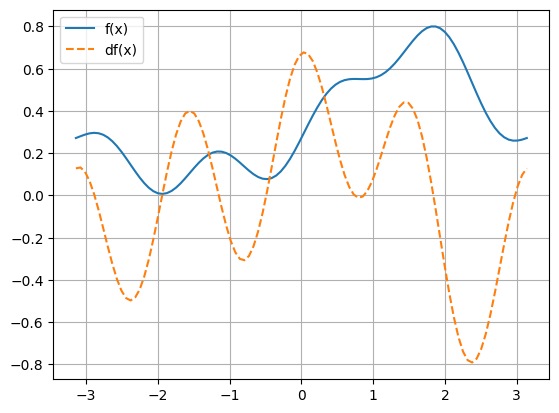

In [9]:
L = 2*np.pi
# L = np.pi
N = 10
dx = L/N
# Note that we do not need to include the last point
# due to the periodic boundary conditions
x = np.arange(-L/2, L/2, dx)

# Define a function and its derivative
# f = lambda x: np.cos(x) + 0.5*np.sin(4*x) 
# df = lambda x: -np.sin(x) + 0.4*np.cos(4*x)

f = lambda x:  0.1*np.exp(1+np.sin(x)) + 0.1*np.sin(4*x)
df = lambda x: 0.1*np.cos(x)*np.exp(1+np.sin(x)) + 0.4*np.cos(4*x)


xfine = np.linspace(-L/2, L/2, 10*N)
plt.plot(xfine, f(xfine), label='f(x)')
plt.plot(xfine, df(xfine), "--", label='df(x)')
plt.legend()
plt.grid(True)
plt.show()


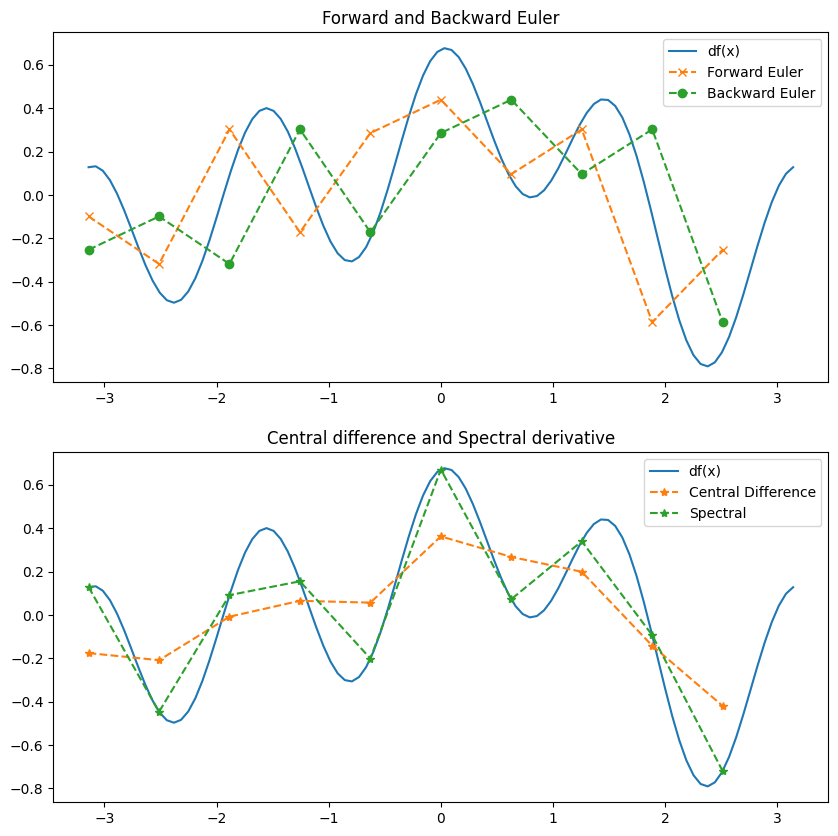

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# First subplot: df, Forward Euler, Backward Euler
axes[0].plot(xfine, df(xfine), label='df(x)')
axes[0].plot(x, df_forward(f, x),  "--x", label='Forward Euler')
axes[0].plot(x, df_backward(f, x), "--o", label='Backward Euler')
axes[0].legend()
axes[0].set_title('Forward and Backward Euler')

# Second subplot: df, Central Euler, Spectral
axes[1].plot(xfine, df(xfine), label='df(x)')
axes[1].plot(x, df_central(f, x),  "--*", label='Central Difference')
axes[1].plot(x, df_spectral(f, x),  "--*", label='Spectral')
axes[1].legend()
axes[1].set_title('Central difference and Spectral derivative')

plt.show()


In [12]:
f = lambda x: np.exp(1+np.sin(x)) 
df = lambda x: np.cos(x)*np.exp(1+np.sin(x))

# Try this one afterwards
# f = lambda x: np.sin(x)
# df = lambda x: np.cos(x)

def compute_eoc(f, df, L, N_list, df_num):
    errs = []
    for N in N_list:
        dx = L/N
        x = np.arange(-L/2, L/2, dx)
        errs.append(np.linalg.norm( df(x) - df_num(f, x), np.inf))
        # print(f'N = {N}, error = {errs[-1]}')
    errs = np.array(errs)
    N_list = np.array(N_list)
    eocs = np.log(errs[1:]/errs[:-1])/np.log(N_list[:-1]/N_list[1:])
    eocs = np.insert(eocs, 0, np.inf)
    return errs, eocs
    
N_list = [4 + 4*k for k in range(0,9)]
print(N_list)


[4, 8, 12, 16, 20, 24, 28, 32, 36]


In [ ]:
table = pd.DataFrame(index=N_list)
for method in [df_forward, df_backward, df_central, df_spectral]:
    errs, eocs = compute_eoc(f, df, L, N_list, method)
    table[method.__name__ + " err"] = errs
    table[method.__name__ + " eoc"] = eocs

display(table)


,df_forward err,df_forward eoc,df_backward err,df_backward eoc,df_central err,df_central eoc,df_spectral err,df_spectral eoc
4,2.973507,inf,2.973507,inf,0.684582,inf,4.762462e-01,inf
8,2.388684,0.315950,2.388684,0.315950,0.924764,-0.433862,1.173730e-02,5.342535
12,1.769479,0.740033,1.769479,0.740033,0.454949,1.749483,1.039718e-04,11.656754
16,1.379133,0.866339,1.379133,0.866339,0.254400,2.020550,4.789322e-07,18.702299
20,1.123439,0.918962,1.123439,0.918962,0.177066,1.624000,1.355863e-09,26.293034
24,0.945513,0.945701,0.945513,0.945701,0.121010,2.087785,2.637446e-12,34.238313
28,0.815314,0.961105,0.815314,0.961105,0.090739,1.867574,1.021405e-14,36.028397
32,0.716189,0.970778,0.716189,0.970778,0.070220,1.919797,7.727152e-14,-15.154197
36,0.638321,0.977245,0.638321,0.977245,0.054645,2.129186,8.570922e-14,-0.879880


**Discussion.**
  * The forward and backward difference operators have a first order convergence rate, while the central difference operator has a second order convergence rate. This can be clearly seen in the convergence study, where double the number of sampling points reduces the error by a factor of 4 for the central difference operator, but only by a factor of 2 for the forward and backward difference operators.
  * The spectral derivative has a much higher convergence rate than the finite difference operators. For $N=28$, the error of the spectral derivative is already roughly at machine precisison.
  Consequently, the error of the spectral derivative cannot get smaller for N roughly larger than 24, which is why we don't observe any positive convergence rate for $N>28$.